Build Feedforward neural networks with Keras and TensorFlow for classification of CIFAR10 image dataset using the following steps: a. Import the necessary packages b. Load the training and testing data c. Define the network architecture using Keras d. Train the model using SGD/Adam optimizer e. Evaluate the network f. Plot the training loss and accuracy

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 7s 85ms/step - accuracy: 0.1227 - loss: 2.7721 - val_accuracy: 0.1976 - val_loss: 2.1463
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1729 - loss: 2.2160 - val_accuracy: 0.1875 - val_loss: 2.0668
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2222 - loss: 2.1096 - val_accuracy: 0.2568 - val_loss: 1.9907
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2328 - loss: 2.0520 - val_accuracy: 0.3041 - val_loss: 1.9359
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2690 - loss: 1.9784 - val_accuracy: 0.3294 - val_loss: 1.8972
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2808 - loss: 1.9386 - val_accuracy: 0.3057 - val_loss: 1.8839
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2949 - loss: 1.9273 - val_accuracy: 0.2922 - val_loss: 1.9245
Epoch 8/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2803 - loss: 1.9351 - val_accuracy: 0.3395 - val_loss

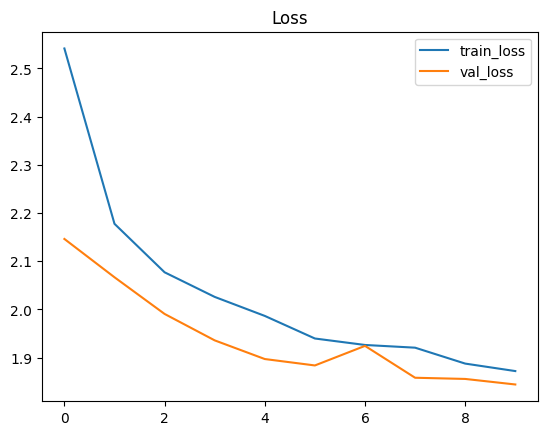

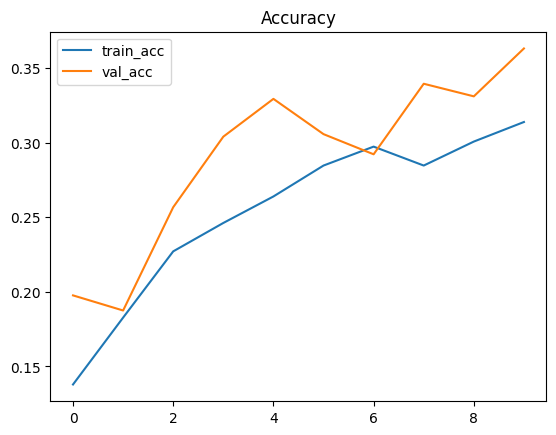

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# ----------------------------------------
# 1) Load CSV files
# ----------------------------------------
train_df = pd.read_csv("train_data.csv")
train_df = train_df.dropna()
test_df  = pd.read_csv("test_data.csv")
test_df = test_df.dropna()
# ----------------------------------------
# 2) Split features & labels
# last column = label
# ----------------------------------------
y_train = train_df.iloc[:, -1].values
X_train = train_df.iloc[:, :-1].values

y_test = test_df.iloc[:, -1].values
X_test = test_df.iloc[:, :-1].values



# ----------------------------------------
# 3) Preprocess
# ----------------------------------------
# Scale pixel values
X_train = X_train.astype("float32") / 255.0
X_test  = X_test.astype("float32") / 255.0

# Reshape: 3072 → (32, 32, 3)
#Using (32,32,3) preserves the spatial structure and channel order (channels_last), which is required for convolutional ops and preserves locality of pixels
X_train = X_train.reshape(-1, 32, 32, 3)
X_test  = X_test.reshape(-1, 32, 32, 3)

# Labels to one-hot
y_train = to_categorical(y_train.astype(int), 10)
y_test  = to_categorical(y_test.astype(int), 10)

# ----------------------------------------
# 4) Build Feedforward Neural Network
# ----------------------------------------
model = Sequential([
    # deflatten 2D images to 1D vectors
    Flatten(input_shape=(32, 32, 3)),
    # relu introduces non-linearity, helps learn complex patterns
    Dense(1024, activation="relu"),
    Dropout(0.3),
    Dense(512, activation="relu"),
    Dropout(0.3),
    Dense(256, activation="relu"),
    # output activation (converts scores → probabilities for classification).
    Dense(10, activation="softmax")
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

# ----------------------------------------
# 5) Train
# ----------------------------------------
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.2,
    verbose=1
)

# ----------------------------------------
# 6) Evaluate
# ----------------------------------------
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.4f},  Test Loss: {test_loss:.4f}")

# ----------------------------------------
# 7) Plot Results
# ----------------------------------------
plt.plot(history.history["loss"], label="train_loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.title("Loss")
plt.legend()
plt.show()

plt.plot(history.history["accuracy"], label="train_acc")
plt.plot(history.history["val_accuracy"], label="val_acc")
plt.title("Accuracy")
plt.legend()
plt.show()


FNN is a neural architecture where data flows strictly forward: input → hidden layers → output.

CIFAR-10 images are 32×32×3 (RGB), making the input dimension 3072 features.

Flattening converts the 3D image into a 1D vector so dense layers can process it.

Fully connected layers learn global patterns by multiplying inputs with trainable weights.

Deeper dense layers (1024 → 512 → 256) allow the network to learn increasingly abstract features.

ReLU activation introduces non-linearity and prevents vanishing gradients.

Dropout randomly turns off neurons during training, reducing overfitting.

Softmax converts the final raw scores into probability distribution across 10 classes.

Categorical cross-entropy measures the difference between predicted and true label distributions.

Adam optimizer adjusts learning rates adaptively, giving stable and faster convergence for large networks.

✅ 2. Important Theory Points FROM YOUR CODE (viva-level)
✅ Data Handling

CSV loaded through Pandas: stored as DataFrames for easy slicing.

Labels extracted using .iloc[:, -1]: last column is the target class.

Pixel scaling (÷255): normalizes image values for stable training.

Reshaping to (32,32,3): converts flattened CIFAR data into RGB image format.

✅ Preprocessing

astype("float32"): required by TensorFlow for GPU efficiency.

to_categorical(): converts class numbers → one-hot vectors required by softmax.

✅ Model Architecture

Flatten(): flattens 3D images into a single vector (3072).

3 dense layers: 1024 → 512 → 256 neurons: progressively extract deeper features.

Dropout(0.3): prevents overfitting by disabling 30% neurons randomly.

Output layer (10): corresponds to the 10 classes of CIFAR-10.

✅ Training Setup

Adam (lr=0.001): adaptive optimizer that converges faster than plain SGD.

categorical_crossentropy loss: standard for multi-class classification.

validation_split=0.2: uses 20% data for checking generalization.

Epochs = 10: trains the model 10 full passes over the data.

batch_size=64: updates weights after every 64 samples.

✅ Evaluation

model.evaluate() returns test_loss & test_accuracy — actual performance on unseen data.

✅ Plotting

Loss curve: shows how the model’s error changes during training/validation.

Accuracy curve: shows model’s correctness over epochs.
Used to detect overfitting or underfitting.

✅ 3. Why FNN for CIFAR-10 is harder than MNIST

CIFAR-10 images have color (3 channels) vs MNIST grayscale.

Input size jumps from 784 → 3072 features.

More neurons needed → bigger model → more computation.

Dropout added to avoid overfitting.

Adam used instead of basic SGD for faster training.

CIFAR-10 is a harder dataset (cars, dogs, airplanes, etc.) compared to simple digits.